## Jean-Eudes Rouffiac  

&nbsp;

&nbsp;

# <center> TP 3 : Lasso </center>



&nbsp;


<p style="text-align:justify;"> Dans ce TP nous allons voir la puissance de la régression Lasso en la comparant à d'autres méthodes de régression. Pour ce faire nous utiliserons le dataset Boston Housing Dataset. Ce dataset contient 506 données et 13 variables. L'objecitf est de prédire la valeur d'une maison en utilisant les variables explicatives suivantes : </p>

* CRIM: Per capita crime rate by town

* ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

* INDUS: Proportion of non-retail business acres per town

* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

* NOX: Nitric oxide concentration (parts per 10 million)

* RM: Average number of rooms per dwelling

* AGE: Proportion of owner-occupied units built prior to 1940

* DIS: Weighted distances to five Boston employment centers

* RAD: Index of accessibility to radial highways

* TAX: Full-value property tax rate per $10,000

* B: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

* LSTAT: Percentage of lower status of the population

* MEDV: Median value of owner-occupied homes in $1000s




&nbsp;


<p style="text-align:justify;"> Import des libraires </p>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import cvxpy as cp
%matplotlib inline


&nbsp;


<p style="text-align:justify;"> Chargement du Dataset </p>

In [2]:
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      


&nbsp;


<p style="text-align:justify;"> Ajout de 5 variables inutiles (qui serviront dans la suite du TP) et on stocke les variables explicatives dans X et la variable à prédire dans y. </p>

In [27]:
n, p = boston.data.shape
q = 5 # Nombre d'attributes inutiles à rajouter
p += q # Nouveau nombre d'attributs

rseed = 10
np.random.seed(rseed)

X = np.concatenate((boston.data, np.random.rand(n, q)), axis=1)
y = boston.target

# Régression linéaire

&nbsp;

<p style="text-align:justify;">  Nous allons dans un premier temps utiliser une simple régression linéaire afin d'avoir un résultat de base sur lequel on pourra comparer nos différentes méthodes. Nous verrons 3 façons de faire une régression linéaire : avec scikit learn, en codant la méthode des moindres carrés à la main, et avec la librairie cvxpy qui permet de résoudre des problèmes d'opimisation.</p>


## Régression linéaire full Scikit-learn

&nbsp;

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=rseed)


#Entraînement du modèle
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)

#Prédictions
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)


In [29]:
from sklearn import metrics 

print("Score sur les données d'apprentissage :")
print("MAE : %.2f " %(metrics.mean_absolute_error(y_train, pred_train)))
print("MSE : %.2f " %(metrics.mean_squared_error(y_train, pred_train)))
print("RMSE : %.2f "%(np.sqrt(metrics.mean_squared_error(y_train, pred_train))))

print("\n")

print("Score sur les données test :")
print("MAE : %.2f " %(metrics.mean_absolute_error(y_test, pred_test)))
print("MSE : %.2f " %(metrics.mean_squared_error(y_test, pred_test)))
print("RMSE : %.2f "%(np.sqrt(metrics.mean_squared_error(y_test, pred_test))))


Score sur les données d'apprentissage :
MAE : 3.23 
MSE : 19.90 
RMSE : 4.46 


Score sur les données test :
MAE : 3.40 
MSE : 24.53 
RMSE : 4.95 


&nbsp;

### Fonction MSE à la main

<p style="text-align:justify;"> On a utilisé précédemment les métrique de SKlearn. On vérifie les résultats obtenus pour MSE en codant la fonction. </p>

&nbsp;

In [30]:
def mse(target, pred):
    nt = len(pred)
    return ( np.mean((target - pred)**2))
    
print("MSE : %.2f " %(mse(y_test, pred_test)))

MSE : 24.53 


<p style="text-align:justify;"> On obtient bien la même valeur. </p>

&nbsp;

&nbsp;

## Avec régression linéaire à la main

&nbsp;

<p style="text-align:justify;">  </p>

<p style="text-align:justify;"> Implémentation de la fonction régression linéaire avec la méthode des moindres carrés</p>

&nbsp;

In [32]:
def linreg(X, y):
    intercept = np.ones((len(X_train), 1)) #Création colonne de 1
    X = np.concatenate((intercept, X_train), axis=1) #Ajout colonne de 1 
    beta_chap = np.linalg.solve(np.dot(X.T,X), np.dot(X.T,y)) #Résolution du système linéaire
    return beta_chap # On retourne beta_chap, le vecteur qui contient les coefficient

In [33]:
# Prédiction des données d'apprentissage et test # affiche du score MSE

beta_chap = linreg(X_train, y_train)

intercept = np.ones((len(X_train), 1))
intercept = np.ones((len(X_test), 1))

X_train = np.concatenate((intercept, X_train), axis=1)
X_test = np.concatenate((intercept, X_test), axis=1)

pred_train = np.dot(X_train, beta_chap)
pred_test = np.dot(X_test, beta_chap)

print("MCO -- MSE apprentissage : %.2f " %(mse(y_train, pred_train)))
print("MCO -- MSE test : %.2f " %(mse(y_test, pred_test)))

MCO -- MSE apprentissage : 19.90 
MCO -- MSE test : 24.53 


&nbsp;

## Avec cvxpy

&nbsp;

<p style="text-align:justify;">  </p>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=rseed)

# Même principe que précedemment, on ajoute une colonne de 1 aux données X_train et X_test

intercept = np.ones((len(X_train), 1))
intercept = np.ones((len(X_test), 1))

X_train = np.concatenate((intercept, X_train), axis=1)
X_test = np.concatenate((intercept, X_test), axis=1)


# Definition et résolution du problème 
beta_chap = cp.Variable(len(X_train[1]))
cost = cp.sum_squares(X_train*beta_chap - y_train)
prob = cp.Problem(cp.Minimize(cost))
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("Beta optimal :")
print(beta_chap.value)



The optimal value is 5035.660566275932
Beta optimal :
[ 1.93234928e+01  1.94616734e+01 -1.46549639e-01  6.54859490e-02
  3.06792631e-02  2.75485053e+00 -1.94435585e+01  3.40296251e+00
  3.12891018e-03 -1.69591626e+00  2.91090000e-01 -1.36215912e-02
 -8.54649965e-01  1.00839076e-02 -5.03591310e-01 -3.55720474e-01
 -2.74855323e-01  9.07094966e-01  7.30374192e-01 -1.23213394e+00]


In [16]:
#Prédictions des données d'apprentissage et test + affichage MSE

pred_train = np.dot(X_train, beta_chap.value)
pred_test = np.dot(X_test, beta_chap.value)
print("MSE apprentissage : %.2f " %(mse(y_train, pred_train)))
print("MSE test : %.2f " %(mse(y_test, pred_test)))

MSE apprentissage : 19.90 
MSE test : 24.53 


&nbsp;

<p style="text-align:justify;"> Nous avons donc vérifier qu'avec les trois méthodes, nous obtenions bien les mêmes résultats.</p>



<p style="text-align:justify;"> Regardons maintenant les résultats obtenus avec la régression Ridge.</p>




&nbsp;

# Régression Ridge


&nbsp;

## En codant Ridge à la main + KFolds

&nbsp;

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=rseed)

&nbsp;

#### Définition de la fonction Ridge

&nbsp;

<p style="text-align:justify;">  </p>

In [46]:
def linregRidge(X, y, alpha):
    beta_chap = np.linalg.solve(np.dot(X.T,X) + alpha * np.eye(len(X[1])) , np.dot(X.T,y)) #Résolution du système linéaire
    return beta_chap # On retourne beta_chap, le vecteur qui contient les coefficients

&nbsp;

#### Recherche du lambda optimal via KFold

&nbsp;

<p style="text-align:justify;">  </p>

In [47]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)

alpha = [i/100 for i in range(1,1000)]
perf_val = [[], [], []]
decoupage = 0

for train , valid in kf.split(X_train):
    X_t = X_train[train,:]
    Y_t = y_train[train]
    X_v = X_train[valid,:]
    Y_v = y_train[valid]
    
    m_t = [X_t[:,k].mean() for k in range(len(X_t[1]))]
    sigma_t = [X_t[:,k].std() for k in range(len(X_t[1]))]
    m_y = Y_t.mean()
    sigma_y = Y_t.std()
    X_t = (X_t - m_t) 
    X_v = (X_v - m_t) 
    Y_t = (Y_t - m_y)   
    
    for a in alpha :
        beta_chap = linregRidge(X_t, Y_t, a)
        pred_valid = np.dot(X_v, beta_chap)
        pred_valid = pred_valid + m_y
        perf_val[decoupage].append(mse(Y_v, pred_valid))
    decoupage += 1
    
perf_globale = np.zeros((len(alpha), 1))

for i in range(0, len(alpha)):
    perf_globale[i] = perf_val[0][i] + perf_val[1][i] + perf_val[2][i]
    perf_globale[i] /= 3
    
a_opt = alpha[np.argmin(perf_globale)]
print('La pénalité optimale est %.3f. ' %a_opt)

La pénalité optimale est 0.160. 


&nbsp;

#### Entraînement du modèle sur l'échantillon d'apprentissage  avec la pénalité optimale

&nbsp;

<p style="text-align:justify;">  </p>

In [48]:
m_t = [X_train[:,k].mean() for k in range(len(X_t[1]))]
m_y = y_train.mean()
X_test = (X_test - m_t) 
y_test = (y_test - m_y) 
X_train = (X_train - m_t) 
y_train = (y_train - m_y) 
 
    
beta_chap = linregRidge(X_train, y_train, a_opt)

&nbsp;

#### Prédiction à l'aide du modèle

&nbsp;

<p style="text-align:justify;">  </p>

In [49]:
pred_train = np.dot(X_train, beta_chap) + m_y
pred_test = np.dot(X_test, beta_chap) + m_y

print("MSE apprentissage : %.2f " %(mse(y_train + m_y, pred_train)))
print("MSE test : %.2f " %(mse(y_test + m_y, pred_test)))

MSE apprentissage : 19.94 
MSE test : 24.47 


&nbsp;

<p style="text-align:justify;"> On obtient donc un meilleur résultat que pour la méthode des moindres carrés ordinaires (nous avions obtenu 24.53). On pourrait utiliser comme précédemment Sklearn et CVXPY pour voir les résultats obtenus mais ce n'est pas vraiment l'objet du TP (c'était l'objet du TP2). On a juste pu voir qu'avec Ridge nous obtenions un meilleur résultat et nous allons maintenant voir si Lasso permet d'obtenir un résultat encore meilleur.  </p>

&nbsp;

# Régression Lasso

&nbsp;

<p style="text-align:justify;"> La régression Lasso est comme la régression Ridge, une régression pénalisée. On cherche à minimiser la fonction coût : 

$$\lVert y-X\beta \rVert^2 + \lambda \lVert \beta \rVert_1$$  avec $\lVert \beta \rVert_1 = \sum_{j=1}^{p}| \beta_j| $  </p>

<p style="text-align:justify;"> Nous utiliserons d'abord CVX, puis nous comparerons avec les résultats de Scikit Learn. Nous ne coderons pas à la main la fonction car la solution du problème de minimisation n'est pas explicite.</p>


&nbsp;

## En utilisant cvxpy

&nbsp;

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=rseed)

&nbsp;

<p style="text-align:justify;"> Nous définissons la fonction cvx qui permet de calculer les beta chapeaux. On a juste ajouté *alpha $\times$ cp.norm1(beta_chap)* à la fonction coût par rapport à la méthode des moindres carrés ordinaires. </p>


&nbsp;

In [51]:
def cvx(X, y, alpha):
    beta_chap = cp.Variable(len(X[1]))
    cost = cp.sum_squares(X*beta_chap - y) + alpha* cp.norm1(beta_chap)
    prob = cp.Problem(cp.Minimize(cost))
    prob.solve()
    return (beta_chap.value)

&nbsp;

<p style="text-align:justify;"> Le paramètre $\alpha$ est donc un hyper paramètre. Il faut donc le choisir de façon à ce qu'il minimise le MSE. Pour ce faire, nous allons utiliser Kfolds pour trouver un $\alpha$ robuste au découpage. </p>


&nbsp;

In [54]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)

#Alpha qui vont être testés
alpha = [i for i in range(1,10)]

#Tableau qui va stocker les résultats
perf_val = [[], [], []]
decoupage = 0

for train , valid in kf.split(X_train):
    X_t = X_train[train,:]
    Y_t = y_train[train]
    X_v = X_train[valid,:]
    Y_v = y_train[valid]
    
    #Les données sont centrées et réduites en fonction des données train
    m_t = [X_t[:,k].mean() for k in range(len(X_t[1]))]
    sigma_t = [X_t[:,k].std() for k in range(len(X_t[1]))]
    m_y = Y_t.mean()
    sigma_y = Y_t.std()
    X_t = (X_t - m_t) / sigma_t
    X_v = (X_v - m_t) / sigma_t
    Y_t = (Y_t - m_y) / sigma_y
    
    for a in alpha :
        #Calcul du beta_chap en appelant la fonction cvx
        beta_chap = cvx(X_t, Y_t, a)
        #On prédit les données de validation grâce à beta_chap
        pred = np.dot(X_v, beta_chap)
        #On dénormalise les données pour qu'elles puissent être comparés aux Y_v
        pred_denormalise = np.dot(pred, sigma_y) + m_y
        #On ajoute le résultat du MSE dans le tableau per_val
        perf_val[decoupage].append(mse(Y_v, pred_denormalise))
    decoupage += 1
    
perf_globale = np.zeros((len(alpha), 1))

#Selection du meilleur alpha
for i in range(0, len(alpha)):
    perf_globale[i] = perf_val[0][i] + perf_val[1][i] + perf_val[2][i]
    perf_globale[i] /= 3
a_opt = alpha[np.argmin(perf_globale)]
print('La pénalité optimale est %.3f. ' %(a_opt))

La pénalité optimale est 4.000. 


&nbsp;

<p style="text-align:justify;"> On peut alors entraîner notre échantillon d'apprentissage avec la pénalité optimale trouvée, puis on prédit nos données test. </p>


&nbsp;

In [30]:
# On normalise les données

m_x = [X_train[:,k].mean() for k in range(len(X_train[1]))]
sigma_x = [X_train[:,k].std() for k in range(len(X_train[1]))]
m_y = y_train.mean()
sigma_y = y_train.std()
X_train = (X_train - m_x) / sigma_x
X_test = (X_test - m_x) / sigma_x
y_train = (y_train - m_y) / sigma_y


# Definition et résolution du problème 
beta_chap = cvx(X_train, y_train, a_opt)
pred_train = np.dot(np.dot(X_train, beta_chap), sigma_y) + m_y
pred_test = np.dot(np.dot(X_test, beta_chap), sigma_y) + m_y
print("LASSO -- MSE train : %.2f " %(mse(np.dot(y_train, sigma_y) + m_y , pred_train)))
print("LASSO -- MSE test : %.2f " %(mse(y_test, pred_test)))

LASSO -- MSE train : 20.18 
LASSO -- MSE test : 24.27 


&nbsp;

<p style="text-align:justify;"> On obtient alors une nette amélioration du résultat puisqu'on obtient 24.27 en MSE, alors qu'on avait 24.47 pour Ridge. </p>


&nbsp;


&nbsp;

## En utilisant scikit_learn

&nbsp;

<p style="text-align:justify;"> Nous utiliserons comme d'habitude KFolds pour obtenir le $\alpha$ optimal avec la fonction lasso de Scikit Learn. Nos données vont être centrées et réduites donc on met le paramètre intercept de la fonction lasso à False. </p>


&nbsp;

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=rseed)

In [56]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)

alpha = [i/100 for i in range(1,1000)]
perf_val = [[], [], []]
decoupage = 0

for train , valid in kf.split(X_train):
    X_t = X_train[train,:]
    Y_t = y_train[train]
    X_v = X_train[valid,:]
    Y_v = y_train[valid]
    
    m_t = [X_t[:,k].mean() for k in range(len(X_t[1]))]
    sigma_t = [X_t[:,k].std() for k in range(len(X_t[1]))]
    m_y = Y_t.mean()
    sigma_y = Y_t.std()
    X_t = (X_t - m_t) / sigma_t
    X_v = (X_v - m_t) / sigma_t
    Y_t = (Y_t - m_y) / sigma_y
    
    for a in alpha :
        lasso = linear_model.Lasso(alpha=a, fit_intercept = False)
        lasso.fit(X_t, Y_t)
        pred_valid = lasso.predict(X_v)* sigma_y + m_y
        perf_val[decoupage].append(mse(Y_v , pred_valid))
    decoupage += 1
    
perf_globale = np.zeros((len(alpha), 1))

for i in range(0, len(alpha)):
    perf_globale[i] = perf_val[0][i] + perf_val[1][i] + perf_val[2][i]
    perf_globale[i] /= 3
a_opt = alpha[np.argmin(perf_globale)]
print('La pénalité optimale est %.3f. ' %a_opt)

La pénalité optimale est 0.010. 


&nbsp;

<p style="text-align:justify;"> On entraîne alors notre modèle sur les données d'apprentissage normalisées avec la pénalité optimale puis on prédit nos données d'apprentissage et test. </p>


&nbsp;

In [247]:
m_x = [X_train[:,k].mean() for k in range(len(X_train[1]))]
sigma_x = [X_train[:,k].std() for k in range(len(X_train[1]))]
m_y = y_train.mean()
sigma_y = y_train.std()
X_train = (X_train - m_x) / sigma_x
X_test = (X_test - m_x) / sigma_x
y_train = (y_train - m_y) / sigma_y 

lasso = linear_model.Lasso(alpha= a_opt , fit_intercept = False)
lasso.fit(X_train, y_train)

pred_train = lasso.predict(X_train) * sigma_y + m_y 
pred_test = lasso.predict(X_test) * sigma_y + m_y 
print("LASSO -- MSE train : %.2f " %(mse(y_train * sigma_y + m_y, pred_train)))
print("LASSO -- MSE test : %.2f " %(mse(y_test, pred_test)))

LASSO -- MSE train : 20.33 
LASSO -- MSE test : 24.30 


&nbsp;

<p style="text-align:justify;"> On obtient donc un moins bon résultat qu'avec CVX. Il semblerait que la fonction Lasso de SKlearn soit codée différement. Le $\alpha$ trouvé est d'ailleurs très différent de celui trouvé avec CVX. Dans tous les cas on peut voir l'importance de coder soit même les fonctions plutôt que d'utiliser SKlearn. Du moins il est toujours mieux de comparer pour une méthode donnée, les résultats avec SKlearn et lorsqu'on code à la main la méthode. </p>


&nbsp;

<p style="text-align:justify;"> On peut représenter l'évolution du MSE en fonction de la valeur de Lambda sur le graphique ci-dessous. On peut voit très clairement que le MSE augmente drastiquement de 0 à 1, puis semble se stabiliser. </p>


&nbsp;

Text(0,0.5,'MSE')

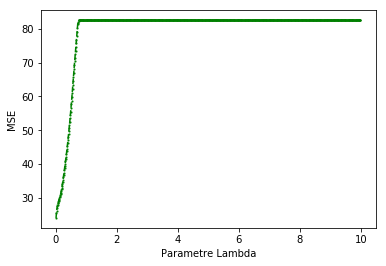

In [57]:
plt.figure()
plt.plot(alpha, perf_globale, color='green', linestyle='--', marker='s', markersize=1, label='Validation')
plt.xlabel('Parametre Lambda')
plt.ylabel('MSE')


&nbsp;

## Evolution des paramètres en fonction de lambda

&nbsp;



<p style="text-align:justify;"> Le graphique suivant montre tout le principe de Lasso. En effet on observe bien le "Shinkrage" (rétrecissement) des coefficients lorsque la valeur de la pénalité augmente. Lorsque $\lambda = 0$, on retrouve l'estimateur des moindres carrés. Lorsque $\lambda$ tend vers des très grandes valeurs, les coefficients s'annulent tous, ce qui n'était pas le cas de la régression Ridge. En effet, la régression Ridge permet de réduire l'amplitude des coefficients d'une régression linéaire. Avec Lasso, des coefficients peuvent s'annuler, rendant le modèle parcimonieux. C'est pourquoi on dit que Lasso est une méthode de sélection de variables. </p>

<p style="text-align:justify;"> En testant lasso pour différentes valeurs de $\lambda$, on obtient un chemin solution représentant l'évolution des coefficients. La courbe d'un coefficient estimé en fonction de $\lambda$ est linéaire par morceaux. Sur le graphique ci-dessous, on observe bien que les variables inutiles ajoutées au modèle sont déjà avec l'estimateur des moindres carrés proches de 0, mais que lorsque $\lambda$ augmente, elles s'annulent rapidement. Pour les autres variables, on observe qu'elles s'annulent bien au fur et à mesure que $\lambda$ augmente.</p>



&nbsp;


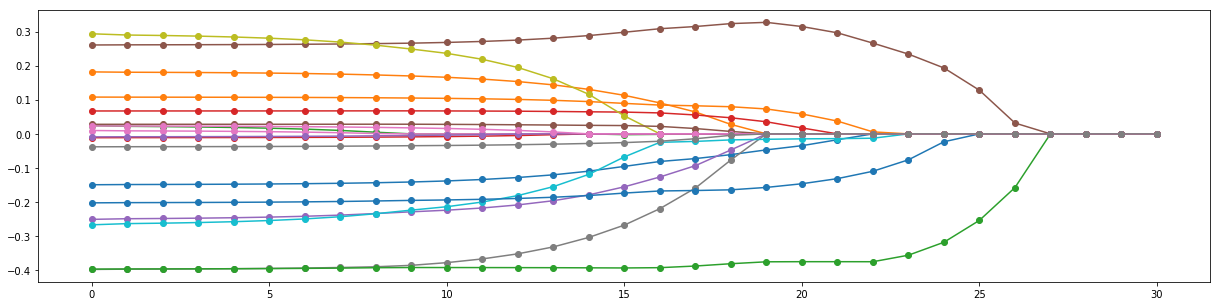

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=rseed)

m_x = [X_train[:,k].mean() for k in range(len(X_train[1]))]
sigma_x = [X_train[:,k].std() for k in range(len(X_train[1]))]
m_y = y_train.mean()
sigma_y = y_train.std()
X_train = (X_train - m_x) / sigma_x
X_test = (X_test - m_x) / sigma_x
y_train = (y_train - m_y) / sigma_y 

Lam = np.logspace(-1,3,30)
Betas = np.linalg.solve(X_train.T @ X_train, X_train.T @ y_train)
for lam in Lam:
  beta1 = cp.Variable(p)
  objective = cp.Minimize(cp.sum_squares(X_train @ beta1 - y_train) + lam*cp.norm(beta1, 1))
  problem = cp.Problem(objective)
  problem.solve()
  Betas = np.c_[Betas, beta1.value]

plt.figure(figsize=(9 * 2 + 3, 5))
plt.plot(Betas.T,'o-')
plt.show()

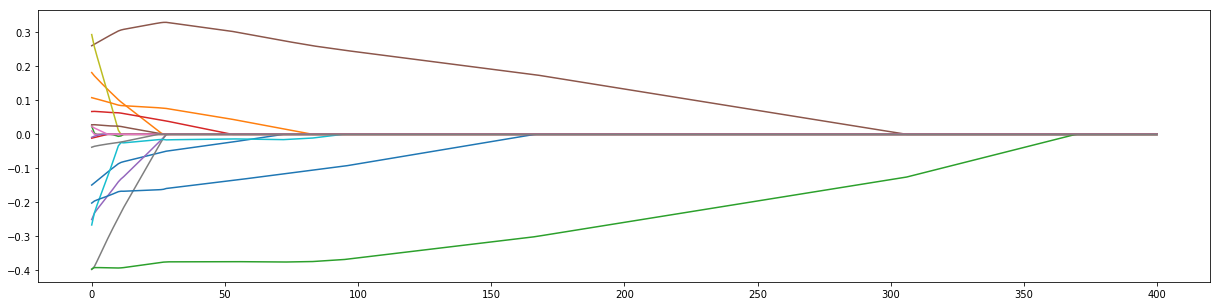

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=rseed)

m_x = [X_train[:,k].mean() for k in range(len(X_train[1]))]
sigma_x = [X_train[:,k].std() for k in range(len(X_train[1]))]
m_y = y_train.mean()
sigma_y = y_train.std()
X_train = (X_train - m_x) / sigma_x
X_test = (X_test - m_x) / sigma_x
y_train = (y_train - m_y) / sigma_y 

Lam = np.linspace(1,400,400)
Betas = np.linalg.solve(X_train.T @ X_train, X_train.T @ y_train)
for lam in Lam:
  beta1 = cp.Variable(p)
  objective = cp.Minimize(cp.sum_squares(X_train @ beta1 - y_train) + lam*cp.norm(beta1, 1))
  problem = cp.Problem(objective)
  problem.solve()
  Betas = np.c_[Betas, beta1.value]


plt.figure(figsize=(9 * 2 + 3, 5))
plt.plot(Betas.T,'-')
plt.show()

&nbsp;

# Elastic Net

&nbsp;

<p style="text-align:justify;"> Nous avons donc vu que l'utilisation de la norme L2 dans Ridge permet d'éviter le sur-apprentissage avec une solution unique, et que l'utilisation de la norme L1 permet d'avoir un modèle avec des coefficients nuls, mais le modèle peut être instable. En effet si plusieurs variables sont corrélées, le lasso va avoir tendance à choisir une seule d'entre elles et annuler les autres, alors que Ridge aurait réparti les poids équitablement. Cette variable différente de 0 est choisie aléatoirement et peut changer si l'optimisation est répétée plusieurs fois, d'où le lasso a tendance à être instable.</p>

<p style="text-align:justify;"> C'est ainsi qu'Elastic Net a été introduit. Ce modèle combine les deux pénalités.</p>

$$arg \min_{\beta}\lVert y-X\beta \rVert^2 + \lambda ( \lVert \beta \rVert_1 + \mu \lVert \beta \rVert_2^2 ) $$ 

En revanche, il y a maintenant deux hyper paramètres à optimiser, ce qui peut être coûteux en calcul.

<p style="text-align:justify;"> Testons maintenant Elastic Net grâce à la librairie CVX.</p>

&nbsp;

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=rseed)

&nbsp;

<p style="text-align:justify;"> Définition de la fonction cvx qui renvoie les beta chapeaux.</p>

&nbsp;

In [181]:
def cvx(X, y, alpha, mu):
    beta_chap = cp.Variable(len(X[1]))
    cost = cp.sum_squares(X*beta_chap - y) + alpha*( cp.norm1(beta_chap) + mu * cp.norm2(beta_chap)**2)
    prob = cp.Problem(cp.Minimize(cost))
    prob.solve()
    return (beta_chap.value)

&nbsp;

<p style="text-align:justify;"> On cherche les paramètres optimaux en utilisant le data test par manque de temps malheureusement. C'est juste pour regarder les performances rapidement, sinon il aurait fallu faire comme précédement utiliser des données de validation pour trouver les hyper paramètres optimaux.</p>

&nbsp;

In [33]:
#Normalisation des données
m_x = [X_train[:,k].mean() for k in range(len(X_train[1]))]
sigma_x = [X_train[:,k].std() for k in range(len(X_train[1]))]
m_y = y_train.mean()
sigma_y = y_train.std()
X_train = (X_train - m_x) / sigma_x
X_test = (X_test - m_x) / sigma_x
y_train = (y_train - m_y) / sigma_y 

#Stocker les résultats
result = []
tab_alpha = []
tab_mu = []

alpha = [i for i in range(1,10)] #Plage de valeurs d'alpha
mu = np.logspace(-1,3,30) #Plage de valeurs de mu

#Double boucle pour trouver les hyperparamètres optimaux
for a in alpha:
    for m in mu:
        beta_chap = cvx(X_train, y_train, a, m)
        pred_test = np.dot(np.dot(X_test, beta_chap), sigma_y) + m_y 
        tab_alpha.append(a)
        tab_mu.append(m)
        result.append(mse(y_test, pred_test))
        
print("Paramètres optimaux : ")
print("Lambda : %d" %(tab_alpha[np.argmin(result)]) )
print("Mu : %f" %(tab_mu[np.argmin(result)]) )
        

Paramètres optimaux : 
Lambda : 4
Mu : 0.100000


&nbsp;

<p style="text-align:justify;"> On peut alors entraîner un modèle avec les hyperparamètres optimaux trouvés.</p>

&nbsp;

In [34]:
# Definition et résolution du problème 
beta_chap = cvx(X_train, y_train, tab_alpha[np.argmin(result)], tab_mu[np.argmin(result)])
pred_train = np.dot(np.dot(X_train, beta_chap), sigma_y) + m_y
pred_test = np.dot(np.dot(X_test, beta_chap), sigma_y) + m_y
print("Elastic Net -- MSE train : %.2f " %(mse(np.dot(y_train, sigma_y) + m_y , pred_train)))
print("Elastic Net -- MSE test : %.2f " %(mse(y_test, pred_test)))

Elastic Net -- MSE train : 20.19 
Elastic Net -- MSE test : 24.28 


Donc sur notre jeu de données, Elastic Net n'apporte pas d'amélioration car avec Lasso on était à 24.27.

&nbsp;

# Adaptive Lasso

&nbsp;

&nbsp;

<p style="text-align:justify;"> On s'intéresse maintenant au modèle Adaptive Lasso, qui consiste au problème de minimisation suivant : </p>

$$\min_{\beta \in \mathbb{R}^p} \lVert y - X \beta \rVert^2 + \lambda \sum_{j=1}^{p}w_j \lvert \beta_j \rvert$$

avec $w_j = \frac{1}{\lvert \hat{\beta_j} \rvert_{MC}}$ et $\hat{\beta_{MC}} = (X^TX)^{-1}X^Ty$


<p style="text-align:justify;">Nous utiliserons la librairie CVX pour résoudre ce problème de minimisation. </p>

&nbsp;

In [20]:
def cvxLasso(X, y, alpha):
    beta_chap_mc = np.linalg.solve(np.dot(X.T,X), np.dot(X.T,y)) #Résolution du système linéaire
    beta_chap = cp.Variable(len(X[1]))
    cost = cp.sum_squares(X*beta_chap - y) + alpha * cp.norm1(beta_chap / beta_chap_mc )
    prob = cp.Problem(cp.Minimize(cost))
    prob.solve()
    return (beta_chap.value)

&nbsp;

<p style="text-align:justify;"> Après normalisation des données, on effectue une validation croisée sur notre jeu de données test (à ne pas faire de base) afin de trouver le $\lambda$ optimal. On entraîne ensuite nos données d'entraînement avec le $\lambda$ optimal, puis on calcul le MSE de la prédiction sur les données test.</p>

&nbsp;

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=rseed)

m_x = [X_train[:,k].mean() for k in range(len(X_train[1]))]
sigma_x = [X_train[:,k].std() for k in range(len(X_train[1]))]
m_y = y_train.mean()
sigma_y = y_train.std()
X_train = (X_train - m_x) / sigma_x
X_test = (X_test - m_x) / sigma_x
y_train = (y_train - m_y) / sigma_y 

alpha = [i/10 for i in range(1,50)]

result = []
for a in alpha:
    beta_chap = cvxLasso(X_train, y_train, a)
    pred_test = np.dot(np.dot(X_test, beta_chap), sigma_y) + m_y
    result.append(mse(y_test, pred_test))
    
best_lambda = alpha[np.argmin(result)]

beta_chap = cvxLasso(X_train, y_train, best_lambda)
pred_test = np.dot(np.dot(X_test, beta_chap), sigma_y) + m_y
print("Adaptive Lasso -- MSE test : %.2f " %(mse(y_test, pred_test)))

Adaptive Lasso -- MSE test : 24.21 


Text(0,0.5,'MSE')

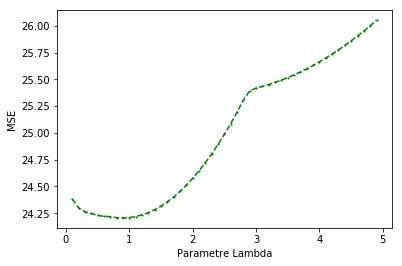

In [24]:
plt.figure()
plt.plot(alpha, result, color='green', linestyle='--', marker='s', markersize=1, label='Test')
plt.xlabel('Parametre Lambda')
plt.ylabel('MSE')

&nbsp;

<p style="text-align:justify;"> On trouve alors un MSE de 24.21, ce qui est de tous les modèles de ce TP, le meilleur résultat.</p>


<p style="text-align:justify;">Pour conclure, on peut retrenir de ce TP l'importance de coder les méthodes soit même en plus d'utiliser Scikit Learn pour vérifier nos résultats. Parfois les résultats sont meilleurs que Scikit Learn, et surtout là ou certains se seraient contenter d'utiliser Lasso avec Scikit Learn, d'autres sachant coder à la main les méthodes auraient donc utiliser Adaptive Lasso qui permet d'avoir de meilleurs résultats.</p>

<p style="text-align:justify;">On a aussi pu voir la puissance de la régression lasso, elastic Net et Adaptive Lasso, qui étaient 3 méthodes inconnus pour moi auparavant.</p>

&nbsp;